In [1]:
import os

import pandas as pd

Average sentences per article: 17.449


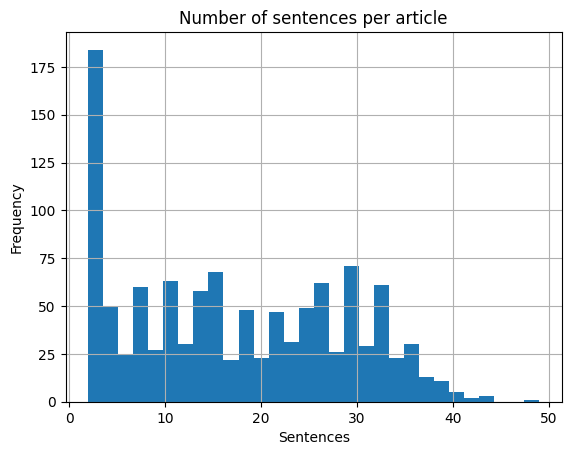

In [2]:
data = pd.read_csv('Data/final_data_with_predictions_new.csv')
group = data.groupby(['URI']).count()

ax = group['Identifier'].hist(bins=30)
ax.set_title('Number of sentences per article')
ax.set_xlabel("Sentences")
ax.set_ylabel("Frequency")

print(f"Average sentences per article: {group['Identifier'].mean():.3f}")

Average articles per event: 15.393


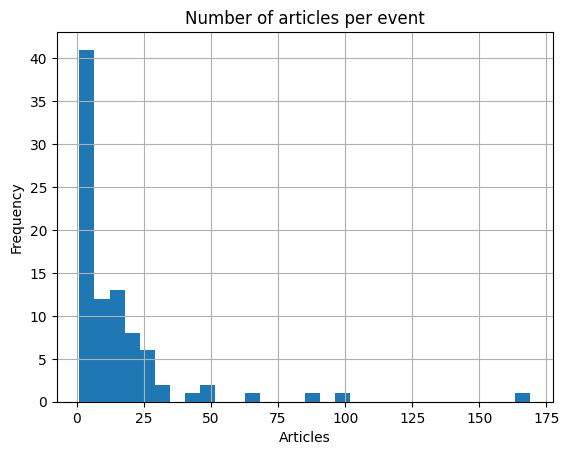

In [5]:
data = pd.read_csv('Data/ASRAEL_data_full.csv')
group = data.groupby(['Event']).count()

ax = group['Identifier'].hist(bins=30)
ax.set_title('Number of articles per event')
ax.set_xlabel("Articles")
ax.set_ylabel("Frequency")

print(f"Average articles per event: {group['Identifier'].mean():.3f}")

In [11]:
group[group['URI'] > 27]

,URI,Identifier,Location,Time,Text
Event,,,,,
http://www.wikidata.org/entity/Q104705419,67,67,67,67,67
http://www.wikidata.org/entity/Q104717056,42,42,42,42,42
http://www.wikidata.org/entity/Q105046769,169,169,169,169,169
http://www.wikidata.org/entity/Q105137806,31,31,31,31,31
http://www.wikidata.org/entity/Q113453221,89,89,89,89,89
http://www.wikidata.org/entity/Q113482948,51,51,51,51,51
http://www.wikidata.org/entity/Q113503169,46,46,46,46,46
http://www.wikidata.org/entity/Q113568279,31,31,31,31,31
http://www.wikidata.org/entity/Q113612174,99,99,99,99,99


In [3]:
import pandas as pd

data = pd.read_csv('Data/ASRAEL_data_full.csv')
data[data['Event'] == 'http://www.wikidata.org/entity/Q113449657']

,URI,Identifier,Event,Location,Time,Text
987,http://asrael.eurecom.fr/news/e0fc169f-1776-32...,urn:newsml:afp.com:20220805T062718Z:TX-PAR-JPY...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-05T06:27:18Z,<nitf><body.content><p>Thailand's prime minist...
995,http://asrael.eurecom.fr/news/33f18665-5676-33...,urn:newsml:afp.com:20220805T102355Z:TX-PAR-JQC...,http://www.wikidata.org/entity/Q113449657,Sattahip,2022-08-05T10:23:55Z,<nitf><body.content><p>Thailand's prime minist...
1009,http://asrael.eurecom.fr/news/fc0cf32c-65d1-3a...,urn:newsml:afp.com:20220805T023156Z:TX-PAR-JPW...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-05T02:31:56Z,<nitf><body.content><p>A fire tore through a T...
1012,http://asrael.eurecom.fr/news/f2262ecd-bc82-36...,urn:newsml:afp.com:20220805T025139Z:TX-PAR-JPX...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-05T02:51:39Z,<nitf><body.content><p>A fire tore through a T...
1018,http://asrael.eurecom.fr/news/5d9667f9-f0bd-39...,urn:newsml:afp.com:20220805T094536Z:TX-PAR-JQB...,http://www.wikidata.org/entity/Q113449657,Sattahip,2022-08-05T09:45:36Z,<nitf><body.content><p>Thailand's prime minist...
1019,http://asrael.eurecom.fr/news/1fba45fc-b80a-33...,urn:newsml:afp.com:20220805T021522Z:TX-PAR-JPW...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-05T02:15:22Z,<nitf><body.content><p>A fire tore through a T...
1025,http://asrael.eurecom.fr/news/3328cee8-8e80-32...,urn:newsml:afp.com:20220806T100224Z:TX-PAR-JQT...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-06T10:02:24Z,<nitf><body.content><p>The death toll from a m...
1076,http://asrael.eurecom.fr/news/14a190f2-8fdf-35...,urn:newsml:afp.com:20220807T052504Z:TX-PAR-JRF...,http://www.wikidata.org/entity/Q113449657,Bangkok,2022-08-07T05:25:04Z,<nitf><body.content><p>Thai police have detain...


In [ ]:
# This is used for evaluating the coreference model
import ast
from resources import node_creation
import pandas as pd

data = pd.read_csv('Data/final_data_with_predictions_new.csv') #Load the original dataset
with open('Data/cluster_data/event_clusters_0.85.txt') as f: #Open the generated cluster file
    cluster_doc = f.readlines()

with open('Data/cluster_data/cluster_0.85_processed.txt', 'w') as output_file:

    for cluster in cluster_doc:
        if cluster.startswith('c'):
            output_file.write(f'{cluster}\n')
            print(cluster)

        if cluster.startswith('['):
            cluster = ast.literal_eval(cluster)

            for mention in cluster:
                mention = mention.split('_')

                sentence = data[(data['URI'] == mention[1]) & (data['Sentence_num'] == int(mention[2]))]['Sentence'].values[0]
                sentence_uri = node_creation('', sentence, base_add='/sentence') #Generate the URI for the sentence

                output_file.write(f"{mention[0]} - {sentence}\n")
                print(f"{mention[0]} - {sentence}\n")

            output_file.write('\n\n')
            print('\n')
output_file.close()

In [11]:
# This is used for evaluating the coreference model
import ast
from resources import node_creation
import pandas as pd

data = pd.read_csv('Data/final_data_with_predictions_new.csv') #Load the original dataset
with open('Data/cluster_data/event_clusters_0.85.txt') as f: #Open the generated cluster file
    cluster_doc = f.readlines()

for cluster in cluster_doc:
    if cluster.startswith('c'):
        print(cluster)

    if cluster.startswith('['):
        cluster = ast.literal_eval(cluster)

        for mention in cluster:
            mention = mention.split('_')

            sentence = data[(data['URI'] == mention[1]) & (data['Sentence_num'] == int(mention[2]))]['Sentence'].values[0]
            sentence_uri = node_creation('', sentence, base_add='/sentence') #Generate the URI for the sentence

            if data[(data['URI'] == mention[1]) & (data['Sentence_num'] == int(mention[2]))]['Subject'].values[0] == mention[0]:
                print("this is a Subject!")

            else:
                print("this is an object")

            print(f"{mention[0]} - {sentence}\n")

        print('\n')

cluster #1

this is an object
confirmed - Thai police have detained the owner of a nightclub in connection with a fire at the venue that killed 15 people, officers confirmed Sunday.



cluster #2

this is a Subject!
issued - A senior police officer in Chonburi province confirmed Sunday that club owner Pongsiri Panprasng had turned himself in after an arrest warrant was issued.



cluster #3

this is an object
confirmed - A senior police officer in Chonburi province confirmed Sunday that club owner Pongsiri Panprasng had turned himself in after an arrest warrant was issued.



cluster #4

this is a Subject!
authorisation - "He remains under detention and police will seek the court's authorisation Monday to detain him while we are investigating," he told AFP.



cluster #5

this is a Subject!
recklessness - The 27-year-old will face several charges, the police officer said, including causing death through recklessness and operating a pub without a licence.



cluster #6

this is an objec

# Get statistics about the made clusters

In [1]:
import pandas as pd
from collections import defaultdict
import os
import ast
from collections import Counter

def def_value():
    return 0

length_clusters=defaultdict(def_value)
length_clusters_list = []
length_clusters_list_normalized = []
total_clusters = 0
total_mentions = 0
total_single_clusters = 0
total_similarities = []


base_path = 'Data/cluster_data/output_all/'
cluster_dirs = os.listdir(base_path)
cluster_docs = [base_path + dir +'/event_clusters.txt' for dir in cluster_dirs if os.path.isdir(base_path + dir)]


for doc in cluster_docs:

    with open(doc) as f: #Open the generated cluster file
        cluster_doc = f.readlines()

    num_mentions_in_doc = 0

    for cluster in cluster_doc:

        if cluster.startswith('['):

            total_clusters +=1

            cluster = ast.literal_eval(cluster)

            len_cluster = len(cluster)
            total_mentions += len_cluster
            num_mentions_in_doc += len_cluster
            length_clusters[len_cluster] = length_clusters[len_cluster] + 1
            length_clusters_list.append(len_cluster)

            if len_cluster > 50:
                print(f"{doc}: length: {len_cluster}")


            if len_cluster == 1:
                total_single_clusters +=1


            if len_cluster != 1: #Skip single clusters
                # count syntactic matches
                word_list = [mention.split('_')[0] for mention in cluster ]

                counts = Counter(word_list)
                similarity = counts.most_common(1)[0][1]/sum(counts.values())
                total_similarities.append(similarity)


    for cluster in cluster_doc:
        length_clusters_list_normalized.append(len_cluster/num_mentions_in_doc)

print(f"Total number of clusters: {total_clusters}")
print(f"Total number of mentions: {total_mentions}")
print(f"Total number of single clusters: {total_single_clusters}")

Data/cluster_data/output_all/Q104759345_dataset/event_clusters.txt: length: 69
Data/cluster_data/output_all/Q105082586_dataset/event_clusters.txt: length: 64
Data/cluster_data/output_all/Q113453221_dataset/event_clusters.txt: length: 55
Data/cluster_data/output_all/Q113453221_dataset/event_clusters.txt: length: 57
Data/cluster_data/output_all/Q113453221_dataset/event_clusters.txt: length: 65
Data/cluster_data/output_all/Q113453221_dataset/event_clusters.txt: length: 145
Data/cluster_data/output_all/Q113568279_dataset/event_clusters.txt: length: 52
Total number of clusters: 28355
Total number of mentions: 45031
Total number of single clusters: 23387


In [19]:
pd.Series(length_clusters_list).describe()

count    28355.000000
mean         1.588115
std          2.431343
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        145.000000
dtype: float64

Text(0.5, 1.0, 'Frequencies of clusters')

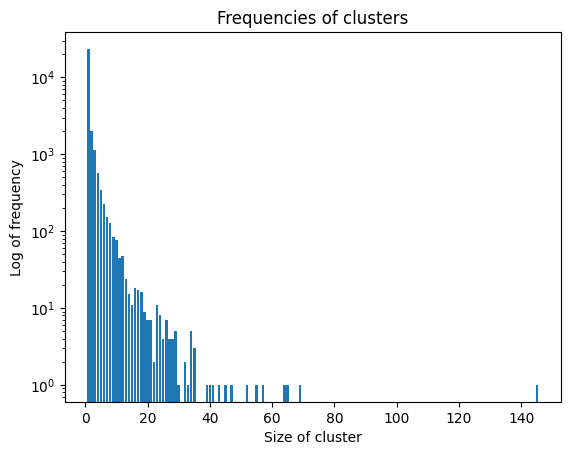

In [3]:
import matplotlib.pyplot as plt

plt.bar(list(length_clusters.keys()), length_clusters.values(), log=True)
plt.xlabel("Size of cluster")
plt.ylabel("Log of frequency")
plt.title("Frequencies of clusters")

Text(0.5, 1.0, 'Nomalized frequencies of clusters')

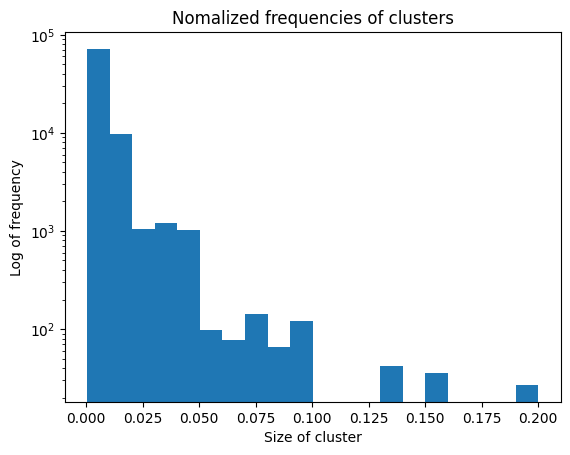

In [4]:
#Normalized by the number of mentions within a document
plt.hist(length_clusters_list_normalized, bins=20, log=True)
plt.xlabel("Size of cluster")
plt.ylabel("Log of frequency")
plt.title("Nomalized frequencies of clusters")

In [13]:
print(f"Exact syntactic matches: {(sum(total_similarities) / len(total_similarities)):.3f}")

Exact syntactic matches: 0.951


In [2]:
# Load the graph, and find an example event with the 4W
from rdflib import Graph

graph = Graph()
graph.parse('Data/graphs/event_article_graph_complete_merged.ttl')


<Graph identifier=Nc5580432e76d44d981c478bcbd4f2a55 (<class 'rdflib.graph.Graph'>)>

In [3]:
# Get an event that has all 4W's
query = """
SELECT DISTINCT ?a
WHERE {
    ?a a ns1:Event .
    ?a ns1:hasActor ?actor .
    ?a ns1:hasPlace ?place .
    ?a ns1:hasTime ?time
}"""

qres = graph.query(query, initNs={"ns1": "http://semanticweb.cs.vu.nl/2009/11/sem/"})
for row in qres:
    print(f"{row}")

(rdflib.term.URIRef('http://www.wikidata.org/entity/Q102850603'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q55632583'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q113531252'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q113630530'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q87920134'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q105612975'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q96016136'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q105008734'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q105082586'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q105137806'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q104705419'),)
(rdflib.term.URIRef('http://www.wikidata.org/entity/Q113453221'),)


In [ ]:
#Statistics about the number of predicates a node has

g = Graph()
g.parse("Data/graphs/event_article_graph_complete.ttl")

query = """
PREFIX sem: <http://semanticweb.cs.vu.nl/2009/11/sem/>
SELECT ?URI ?
WHERE {
    ?s a sem:Event;
        ?p ?o
}"""

qres = g.query(query)
for row in qres:
    print(f"num_pred: {row.num_predicates} - num_events: {row.num_events}: on average: {int(row.num_predicates) / int(row.num_events)}")

query = """
PREFIX sem: <http://semanticweb.cs.vu.nl/2009/11/sem/>
PREFIX rnews: <http://iptc.org/std/rNews/2011-10-07#>
SELECT (COUNT(?p) as ?num_predicates) (COUNT(DISTINCT ?s) as ?num_articles)
WHERE {
    ?s a rnews:Article;
        ?p ?o
}"""

qres = g.query(query)
for row in qres:
    print(f"num_pred: {row.num_predicates} - num_article: {row.num_articles}: on average: {int(row.num_predicates) / int(row.num_articles)}")